In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
%matplotlib inline

import webscrape

/Users/bumho/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [68]:
athlete = "stephen curry"
season = "2014-15"
web_df = webscrape.getData(athlete, season[:-3])

In [69]:
def shot(s_type):
    if "jump shot" in s_type.lower():
        return "jump"
    elif "layup shot" in s_type.lower():
        return "layup"
    else:
        return "else"
    
def shot_dist(dist):
    if dist < 8:
        return "less than 8"
    elif dist < 16:
        return "8-16"
    elif dist < 24:
        return "16-24"
    else:
        return "24+"
    
def def_dist(dist):
    if dist < 2:
        return "0-2"
    elif dist < 4:
        return "2-4"
    elif dist < 6:
        return "4-6"
    else:
        return "6+"

In [70]:
logistic = LogisticRegression()

In [71]:
def transform_web(data):
    data = data.copy()
    shot_type = pd.get_dummies(data["Shot Type"].apply(shot))
    data["Shot Dist."] = data["Shot Dist."].apply(lambda x : float(x.replace("ft.", "")))
    shot_clock = data["Shot Clock"].apply(lambda x: float(x))
    touch_time = data["Touch Time"].apply(lambda x: float(x))
    drib = data["Drib."].apply(lambda x: int(x))
    data["Def Dist."] = data["Def Dist."].apply(lambda x: float(x))

    def_dist_c = pd.get_dummies(data["Def Dist."].apply(def_dist))

    
    shot_dist_c = pd.get_dummies(data["Shot Dist."].apply(shot_dist))
    
    con = [shot_type, shot_clock, touch_time, drib, data["Shot Dist."],data["Def Dist."],def_dist_c, 
           shot_dist_c, (data["Made?"]=="Yes").astype(int)]
    new_shot_chart = pd.concat(con , axis=1)
    return new_shot_chart

tt = transform_web(web_df)
tt

,else,jump,layup,Shot Clock,Touch Time,Drib.,Shot Dist.,Def Dist.,0-2,2-4,4-6,6+,16-24,24+,8-16,less than 8,Made?
0,1,0,0,16.0,6.3,8,5.2,3.2,0,1,0,0,0,0,0,1,1
1,1,0,0,2.9,4.5,5,13.6,1.7,1,0,0,0,0,0,1,0,1
2,1,0,0,9.3,0.8,0,6.0,3.7,0,1,0,0,0,0,0,1,1
3,1,0,0,15.3,8.7,10,9.0,2.3,0,1,0,0,0,0,1,0,1
4,1,0,0,20.8,0.8,0,4.1,2.5,0,1,0,0,0,0,0,1,1
5,0,0,1,20.9,1.8,1,4.4,3.8,0,1,0,0,0,0,0,1,0
6,0,0,1,21.0,2.9,3,6.1,4.1,0,0,1,0,0,0,0,1,0
7,0,0,1,14.5,3.1,2,6.2,0.3,1,0,0,0,0,0,0,1,1
8,0,0,1,18.3,4.4,5,6.1,2.7,0,1,0,0,0,0,0,1,0
9,0,0,1,13.6,10.5,14,4.6,4.3,0,0,1,0,0,0,0,1,1


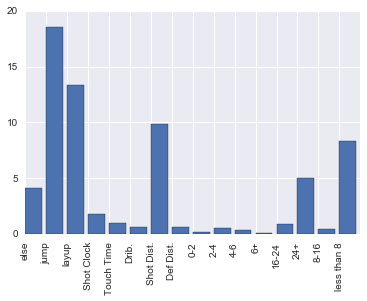

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

predictors = tt.columns[:-1]

selector = SelectKBest(k=5)
selector.fit(tt[predictors], tt["Made?"])
scores = -np.log10(selector.pvalues_)
plt.bar(range(len(scores)), scores)
plt.xticks(np.arange(.2, len(scores)+.2), predictors, rotation="vertical")
plt.show()

In [64]:
def trials(n, model, X, pred1, pred2, y, show_coef = True):

    x1_ma = np.zeros(n,)
    x2_ma = np.zeros(n,)
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.5)
        model.fit(X_train[pred1], y_train)
        x1_ma[i] = model.score(X_test[pred1], y_test)
        
        model.fit(X_train[pred2], y_train)
        x2_ma[i] = model.score(X_test[pred2], y_test)

    print "X1", x1_ma.mean()
    print "X2", x2_ma.mean()
    print x1_ma.mean() - x2_ma.mean()
    if show_coef:
        print model.coef_
    return x1_ma - x2_ma

X1 0.578912071535
X2 0.610476900149
-0.031564828614
[[ 0.00088081  0.53894213 -0.65404912  0.51266394]]


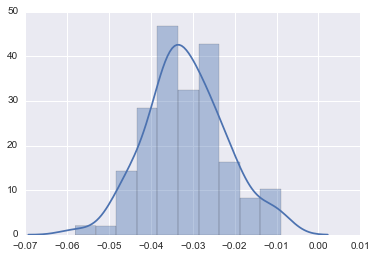

In [74]:
# predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8']
predictor1 = ['Shot Dist.']
predictor2 = predictor1 + [u'else', u'jump', u'layup']
a = trials(100, LogisticRegression(), tt, predictor1, predictor2, tt["Made?"])
sns.distplot(a)
# plt.savefig("./graphs/compareShotDist&Type.png")

Adding the type of shot definitely helps the accuracy 

X1 0.604456035768
X2 0.61304023845
-0.00858420268256
[[ 0.05282477 -0.47568306  0.12662859  0.23364705  0.58424827 -0.86412093
   0.21729001  0.1543499 ]]


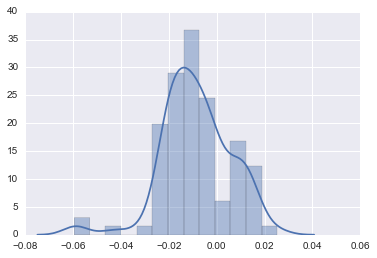

In [75]:
predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ ['Def Dist.']
a= trials(100, LogisticRegression(), tt, predictor1, predictor2, tt["Made?"])
sns.distplot(a)
# plt.savefig("./graphs/compareBase&DefDist.png")

Adding defender distance also seems to helps the accuracy

In [100]:
predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ [u'0-2',u'2-4',u'4-6', u'6+']
a= trials(100, LogisticRegression(), tt, predictor1, predictor2, tt["Made?"])

X1 0.608301043219
X2 0.603532041729
0.00476900149031
[[ 0.01112231  0.06207442  0.19602153  0.01132191  0.3663715  -0.75636826
   0.67053694 -0.46550875  0.11569868  0.1532014   0.47714885]]


Strangely when we binarize the defender distance, it seems to lower the accuracy

X1 0.605976154993
X2 0.604962742176
0.00101341281669
[[ 0.0485705   0.00627916  0.12106486  0.09334297  0.30381742 -0.53717729
   0.50261736 -0.03704854]]


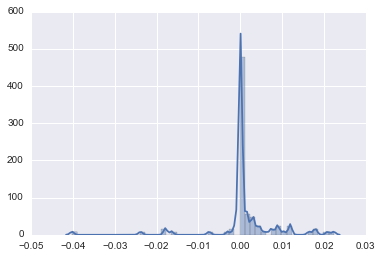

In [77]:
predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ ['Touch Time']
a=trials(100, LogisticRegression(), tt, predictor1, predictor2, tt["Made?"])
sns.distplot(a)
# plt.savefig("./graphs/compareBase&TouchTime.png")

In [102]:
predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ ['Shot Clock']
a= trials(100, LogisticRegression(), tt, predictor1, predictor2, tt["Made?"])

X1 0.605096870343
X2 0.60478390462
0.000312965722802
[[ 0.09960512 -0.05340484  0.30307835 -0.1399905   0.47571794 -0.9408995
   0.67446969  0.02021865]]


Both touch time and shot clock does not really seem to help the model's performance

In [31]:
predictor1 = [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup', 'Def Dist.']

Just looking at stephs is misleading and it could be overfitting to his shots
also we do not have enough shots and we would like more
Lets create a guard model and 

In [13]:
guards_100 = [
    "James Harden","Damian Lillard","Chris Paul","John Wall","Eric Bledsoe","Joe Johnson","Kyrie Irving","Monta Ellis",
     "Tyreke Evans","Ben McLemore","Ty Lawson","Goran Dragic","Stephen Curry","Kentavious Caldwell-Pope","Victor Oladipo",
     "Jimmy Butler","Arron Afflalo","Elfrid Payton","Klay Thompson","Avery Bradley","Kyle Korver","Kyle Lowry",
     "JJ Redick","Mario Chalmers","Courtney Lee","Gerald Henderson","Danny Green","Russell Westbrook","Trey Burke",
     "Reggie Jackson","Evan Turner","Jarrett Jack","Jeff Teague","Mike Conley","Dion Waiters","Michael Carter-Williams",
     "Kemba Walker","Deron Williams","Bradley Beal","DeMar DeRozan","J.R. Smith","Andre Iguodala","Brandon Knight",
     "Wesley Matthews","Eric Gordon","Rajon Rondo","Lou Williams","Greivis Vasquez","Mo Williams","Dwyane Wade","D.J. Augustin",
     "Tony Parker","Jeremy Lin","Zach LaVine","Aaron Brooks","Rodney Stuckey","Shane Larkin","Bojan Bogdanovic","CJ Miles",
     "Norris Cole","Dante Exum","Marcus Smart","Anthony Morrow","Quincy Pondexter","Hollis Thompson","Alan Anderson",
     "Patrick Beverley","Isaiah Thomas","Jerryd Bayless","Jamal Crawford","O.J. Mayo","Devin Harris","Tim Hardaway",
     "Wayne Ellington","Evan Fournier","Tony Allen","Jason Terry","Kirk Hinrich","Manu Ginobili","Lance Stephenson",
     "Darren Collison","Austin Rivers","Iman Shumpert","Derrick Rose","Steve Blake","Dennis Schroder","Rasual Butler",
     "Beno Udrih","Jordan Clarkson","Shaun Livingston","Jodie Meeks","Langston Galloway","Gerald Green","Cory Joseph",
     "Ray McCallum","CJ Watson","Tony Snell","Jameer Nelson","Marco Belinelli","Matthew Dellavedova"
]
guards_list = []
for player in guards_100:
    print player
    guards_list.append(webscrape.getData(player, "2014"))
    
guards_big = pd.concat(guards_list)
guards_big.reset_index(drop=True, inplace =True)

James Harden
Damian Lillard
Chris Paul
John Wall
Eric Bledsoe
Joe Johnson
Kyrie Irving
Monta Ellis
Tyreke Evans
Ben McLemore
Ty Lawson
Goran Dragic
Stephen Curry
Kentavious Caldwell-Pope
Victor Oladipo
Jimmy Butler
Arron Afflalo
Elfrid Payton
Klay Thompson
Avery Bradley
Kyle Korver
Kyle Lowry
JJ Redick
Mario Chalmers
Courtney Lee
Gerald Henderson
Danny Green
Russell Westbrook
Trey Burke
Reggie Jackson
Evan Turner
Jarrett Jack
Jeff Teague
Mike Conley
Dion Waiters
Michael Carter-Williams
Kemba Walker
Deron Williams
Bradley Beal
DeMar DeRozan
J.R. Smith
Andre Iguodala
Brandon Knight
Wesley Matthews
Eric Gordon
Rajon Rondo
Lou Williams
Greivis Vasquez
Mo Williams
Dwyane Wade
D.J. Augustin
Tony Parker
Jeremy Lin
Zach LaVine
Aaron Brooks
Rodney Stuckey
Shane Larkin
Bojan Bogdanovic
CJ Miles
Norris Cole
Dante Exum
Marcus Smart
Anthony Morrow
Quincy Pondexter
Hollis Thompson
Alan Anderson
Patrick Beverley
Isaiah Thomas
Jerryd Bayless
Jamal Crawford
O.J. Mayo
Devin Harris
Tim Hardaway
Wayne Ell

In [36]:
def transform_big(data):
    data = data.copy()
    shot_type = pd.get_dummies(data["Shot Type"].apply(shot))
    data["Shot Dist."] = data["Shot Dist."].apply(lambda x : x.replace("ft.", ""))
    data["Shot Dist."] = data["Shot Dist."].apply(lambda x : 0 if x== "" else float(x))
    
    shot_clock = data["Shot Clock"].apply(lambda x: 0 if x == "" else float(x))
    touch_time = data["Touch Time"].apply(lambda x: float(x))
    drib = data["Drib."].apply(lambda x: int(x))
    data["Def Dist."] = data["Def Dist."].apply(lambda x: float(x))

    def_dist_c = pd.get_dummies(data["Def Dist."].apply(def_dist))
    
    player_c = pd.get_dummies(data["Player"])

    shot_dist_c = pd.get_dummies(data["Shot Dist."].apply(shot_dist))
    
    con = [player_c, shot_type, shot_clock, touch_time, drib, data["Def Dist."],
           def_dist_c, shot_dist_c, data["Shot Dist."],(data["Made?"]=="Yes").astype(int)]
    
#     con = [player_c, shot_type, shot_clock, touch_time, drib, 
#            shot_dist_c, data["Shot Dist."],(data["Made?"]=="Yes").astype(int)]
        
    new_shot_chart = pd.concat(con , axis=1)

    return new_shot_chart

df_guards = transform_big(guards_big)

In [28]:
len(guards_100)
df_guards.columns[:99]

Index([u'Aaron Brooks', u'Alan Anderson', u'Andre Iguodala', u'Anthony Morrow',
       u'Arron Afflalo', u'Austin Rivers', u'Avery Bradley', u'Ben McLemore',
       u'Beno Udrih', u'Bojan Bogdanovic', u'Bradley Beal', u'Brandon Knight',
       u'CJ Miles', u'CJ Watson', u'Chris Paul', u'Cory Joseph',
       u'Courtney Lee', u'DJ Augustin', u'Damian Lillard', u'Danny Green',
       u'Dante Exum', u'Darren Collison', u'DeMar DeRozan', u'Dennis Schroder',
       u'Deron Williams', u'Derrick Rose', u'Devin Harris', u'Dion Waiters',
       u'Dwyane Wade', u'Elfrid Payton', u'Eric Bledsoe', u'Eric Gordon',
       u'Evan Fournier', u'Evan Turner', u'Gerald Green', u'Goran Dragic',
       u'Greivis Vasquez', u'Hollis Thompson', u'Iman Shumpert',
       u'Isaiah Thomas', u'JJ Redick', u'JR Smith', u'Jamal Crawford',
       u'Jameer Nelson', u'James Harden', u'Jarrett Jack', u'Jason Terry',
       u'Jeff Teague', u'Jeremy Lin', u'Jerryd Bayless', u'Jimmy Butler',
       u'Jodie Meeks', u'Joe Joh

In [37]:
predictor = df_guards.columns[:99].tolist()
predictor1 = predictor+ [u'16-24', u'24+', u'8-16', u'less than 8']
predictor2 = predictor1 + [u'else', u'jump', u'layup']
a = trials(100, LogisticRegression(), df_guards, predictor1, predictor2, df_guards["Made?"])

X1 0.592912288284
X2 0.621227477782
-0.0283151894973
[[ -1.30985219e-01  -1.59016806e-01   1.25841812e-01   2.97401726e-01
    5.49079838e-02  -7.43225337e-02   8.18896814e-02   4.33388751e-02
    3.78296209e-01   1.21864776e-01  -1.17723688e-02  -6.14748330e-02
    2.57517507e-02  -6.17211786e-02   3.56085220e-01   6.12131946e-02
    1.38391778e-01  -1.16317617e-01   4.25940539e-02   1.80420842e-01
   -3.55714154e-02   1.73389534e-01  -1.06914510e-01  -9.22298759e-02
   -1.82945640e-01  -1.14602429e-01   8.04471214e-02  -2.78340644e-01
    1.22337283e-01  -1.73539122e-01   1.10241219e-02  -7.84194213e-02
   -8.57167982e-02  -1.21146184e-03   6.39997253e-02   8.46068725e-02
    1.15342140e-02  -3.23508807e-02  -7.87402714e-02  -5.38752425e-02
    2.87833679e-01   3.46041687e-02  -3.32291131e-02   1.40304101e-01
    2.11774366e-02   3.09694306e-02   2.20702869e-01   6.93143820e-02
   -3.66432625e-02  -7.33923456e-02  -5.05653755e-02   1.52051448e-02
    1.26665328e-01   9.50260855e-02  

In [38]:
predictor1 = predictor+ [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ ['Def Dist.']
a = trials(100, LogisticRegression(), df_guards, predictor1, predictor2, df_guards["Made?"])

X1 0.621321753694
X2 0.620690456252
0.000631297441854
[[ -9.22938875e-02   1.76649134e-01  -8.76127453e-02   1.47496367e-01
    1.50478435e-01  -1.72185001e-01   8.76978725e-02   1.95588494e-01
    1.50287745e-01  -4.48597361e-02  -5.71241704e-02   1.80184248e-02
   -7.82991991e-02  -1.77124507e-01   2.80827615e-01   3.60816561e-01
    1.85306392e-01  -5.54697451e-02   8.18127272e-02   2.30112110e-01
   -2.51947263e-01   3.03619750e-01  -5.96282924e-02  -5.60459755e-02
   -1.35281175e-01   1.27350951e-03  -9.08654770e-02  -2.31387593e-01
    4.36566061e-02  -2.76725781e-01   2.81449697e-02  -4.86970819e-02
    9.88176220e-03  -1.20450968e-01   2.74697600e-04   1.99302680e-01
    3.26812250e-02   3.72462017e-03   8.84872387e-02  -2.23429075e-02
    2.97951493e-01   2.57403288e-02  -5.58938924e-02   3.42945366e-02
    3.63760166e-02   1.64919339e-01   2.61474564e-01   3.53499551e-02
   -1.53006702e-01   6.61137849e-03   6.93317009e-02   1.00140245e-02
    1.73034550e-01  -8.59131349e-03 

In [40]:
predictor1 = predictor+ [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ [u'0-2',u'2-4',u'4-6', u'6+']
a = trials(100, LogisticRegression(), df_guards, predictor1, predictor2, df_guards["Made?"])

X1 0.621136443448
X2 0.62292363381
-0.00178719036171
[[  5.91712398e-03   1.94286708e-01  -1.47574631e-02   2.65096253e-01
    1.42700197e-02  -2.40410022e-01  -4.52049553e-04  -1.99764470e-02
    3.71050342e-01   2.77924862e-03   1.49562188e-02   4.83368945e-02
    1.46473367e-02   9.72334949e-02   3.01804708e-01   9.42519715e-02
    1.01280250e-01  -1.74989831e-01  -1.60797141e-02   8.58361709e-02
   -2.67034118e-01  -1.12201784e-02  -4.92121295e-02  -1.91178938e-01
   -1.93580753e-01  -9.56940948e-02   6.07748799e-03  -1.54052838e-01
    2.66494225e-02  -1.79032999e-01  -5.03105188e-02   1.05071848e-02
   -4.60050793e-02  -1.58060750e-01   5.30835726e-02   1.54875799e-01
   -1.44173181e-02   3.01231467e-02   5.94535995e-02   3.92823228e-02
    4.29247350e-01   3.60299019e-02  -2.84358101e-02   5.07320175e-02
   -6.22501273e-02   1.12737826e-01   1.07595573e-01   1.27535750e-01
   -2.72169916e-02   9.34604666e-03   2.82085529e-02   1.53073636e-02
    1.15365660e-01  -8.54723020e-02  

In [41]:
predictor1 = predictor+ [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ ['Touch Time']
a = trials(100, LogisticRegression(), df_guards, predictor1, predictor2, df_guards["Made?"])

X1 0.621322293957
X2 0.621147788973
0.000174504983927
[[ -9.96081944e-02  -7.06324401e-02   1.15201129e-01   2.70086087e-01
    2.96108203e-02  -2.10050037e-01   1.39695384e-01   5.78107966e-02
    3.06268776e-01   1.55683003e-01   1.40156811e-01   7.96024395e-02
    7.60101406e-02   1.30140521e-01   4.43664633e-01   2.62337311e-01
   -1.16523653e-01  -1.14178939e-01  -1.66633055e-02   8.69484475e-02
   -3.49820038e-01   2.70468045e-01  -2.16013183e-01  -1.99930116e-01
   -9.57295880e-02  -2.23629195e-01   5.01902297e-02  -1.53951235e-01
    8.45343073e-02  -2.67875882e-01   3.30479258e-02  -4.96913763e-02
   -8.47606844e-02   1.96826238e-02   4.66498699e-02   1.90149857e-01
    9.39164270e-02  -1.27386919e-02   8.07928767e-02  -1.10329900e-03
    2.55180163e-01   1.18220148e-01   2.06183634e-02  -3.81071295e-02
   -2.90599741e-02   4.09264486e-02  -2.75844066e-02   1.44560190e-02
   -2.67916209e-02  -6.36455411e-02  -9.73534200e-03  -3.91830084e-02
    9.78900886e-02   1.12540201e-01 

In [42]:
predictor1 = predictor+ [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
predictor2 = predictor1+ ['Shot Clock']
a = trials(100, LogisticRegression(), df_guards, predictor1, predictor2, df_guards["Made?"])

X1 0.620694238094
X2 0.620641022178
5.32159161509e-05
[[ -1.22210593e-01  -1.44887673e-02   7.19615650e-02   1.75634695e-01
   -1.43405020e-02  -9.42882084e-02   7.91102879e-02   1.11656845e-01
    2.20183402e-01  -1.02119440e-01   1.42264649e-01  -9.82105744e-02
    4.09792345e-04   1.99921335e-01   3.86568861e-01   2.99131307e-01
    1.45917141e-01  -8.64846775e-02   6.01897327e-02   5.39077367e-02
   -2.19002951e-01   2.17438319e-01  -1.61848229e-01  -2.53405153e-01
   -5.18020967e-02  -1.77911590e-02   5.15319233e-02  -3.23424080e-01
    7.13867026e-02  -2.71669630e-01   2.40174088e-02   4.19895705e-02
    3.67526039e-02  -1.08089186e-01  -6.06290171e-02   9.64482945e-02
    7.71826327e-03  -8.00382638e-02  -3.44410349e-01   7.75037164e-02
    2.84975475e-01  -8.25551093e-03  -3.94245030e-02   2.63918838e-02
    3.99484450e-02   1.47999252e-01   7.98646156e-02   5.04005148e-02
   -2.56789485e-01   1.60939437e-01   5.81030216e-02   1.57926046e-01
    2.07776593e-01  -2.11298377e-02 

In [43]:
forward_100 = [
    "Andrew Wiggins","Trevor Ariza","Pau Gasol","Gordon Hayward","Markieff Morris","Giannis Antetokounmpo","Kevin Love",
    "LaMarcus Aldridge","LeBron James","Draymond Green","Wilson Chandler","Anthony Davis","Jeff Green","Thaddeus Young",
    "Luol Deng","Rudy Gay","Paul Millsap","PJ Tucker","Solomon Hill","Nicolas Batum","Khris Middleton","Tobias Harris",
    "Blake Griffin","Harrison Barnes","Al Horford","Nerlens Noel","Zach Randolph","Josh Smith","Dirk Nowitzki",
    "Derrick Favors","Matt Barnes","Wesley Johnson","Tim Duncan","Tristan Thompson","DeMarre Carroll","Chandler Parsons",
    "Patrick Patterson","Serge Ibaka","Terrence Ross","Corey Brewer","Kenneth Faried","Marcus Morris","Donatas Motiejunas",
    "Marvin Williams","Kawhi Leonard","Jason Thompson","Boris Diaw","Amir Johnson","Robert Covington","Brandon Bass",
    "Paul Pierce","David West","Channing Frye","Ed Davis","Mike Dunleavy","Jason Smith","Mason Plumlee",
    "Kyle Singler","Tyler Zeller","Jared Dudley","Taj Gibson","Ryan Anderson","Joe Ingles","Luis Scola",
    "Nikola Mirotic","Dante Cunningham","Jae Crowder","Caron Butler","Michael Kidd-Gilchrist","Jared Sullinger","Trevor Booker",
    "Chris Bosh","Lance Thomas","Cody Zeller","Derrick Williams","Brandan Wright","Otto Porter","Anthony Tolliver",
    "Carmelo Anthony","Danilo Gallinari","Kelly Olynyk","Omri Casspi","JJ Hickson","Tayshaun Prince","Jerami Grant",
    "James Johnson","Al-Farouq Aminu","Kris Humphries","Ersan Ilyasova","Quincy Acy","Chase Budinger","Amar'e Stoudemire",
    "Richard Jefferson","Kevin Seraphin","Ryan Kelly","Jonas Jerebko","John Henson","Carl Landry"
]


Andrew Wiggins
Trevor Ariza
Pau Gasol
Gordon Hayward
Markieff Morris
Giannis Antetokounmpo
Kevin Love
LaMarcus Aldridge
LeBron James
Draymond Green
Wilson Chandler
Anthony Davis
Jeff Green
Thaddeus Young
Luol Deng
Rudy Gay
Paul Millsap
PJ Tucker
Solomon Hill
Nicolas Batum
Khris Middleton
Tobias Harris
Blake Griffin
Harrison Barnes
Al Horford
Nerlens Noel
Zach Randolph
Josh Smith
Dirk Nowitzki
Derrick Favors
Matt Barnes
Wesley Johnson
Tim Duncan
Tristan Thompson
DeMarre Carroll
Chandler Parsons
Patrick Patterson
Serge Ibaka
Terrence Ross
Corey Brewer
Kenneth Faried
Marcus Morris
Donatas Motiejunas
Marvin Williams
Kawhi Leonard
Jason Thompson
Boris Diaw
Amir Johnson
Robert Covington
Brandon Bass
Paul Pierce
David West
Channing Frye
Ed Davis
Mike Dunleavy
Jason Smith
Mason Plumlee
Kyle Singler
Tyler Zeller
Jared Dudley
Taj Gibson
Ryan Anderson
Joe Ingles
Luis Scola
Nikola Mirotic
Dante Cunningham
Jae Crowder
Caron Butler
Michael Kidd-Gilchrist
Jared Sullinger
Trevor Booker
Chris Bosh
Lanc

In [45]:
base = [u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
compare = [
    [[u'16-24', u'24+', u'8-16', u'less than 8'],[u'else', u'jump', u'layup']], 
    [base,['Def Dist.']],
    [base,[u'0-2',u'2-4',u'4-6', u'6+']],
    [base,['Touch Time']],
    [base , ['Shot Clock']]
]

In [58]:
def getDataFrame(lst):
    app = []
    for player in lst:
        app.append(webscrape.getData(player, "2014"))
    print "done"
    df = pd.concat(app)
    return df
#     rst = df.reset_index(drop=True, inplace =True)
#     return transform_big(rst)

In [65]:
def test(df, compare):
    predictor = df.columns[:99].tolist()
    for t in compare:
        predictor1 = predictor + t[0]
        predictor2 = predictor1 + t[1]
        print t[0]
        print t[1] 
        a = trials(100, LogisticRegression(), df, predictor1, predictor2, df["Made?"], show_coef=False)
        print "\n -----------"

In [62]:
forward_big.reset_index(drop=True, inplace =True)
forward_big = transform_big(forward_big)

In [66]:
test(forward_big, compare)

[u'16-24', u'24+', u'8-16', u'less than 8']
[u'else', u'jump', u'layup']
X1 0.601083392291
X2 0.632582361807
-0.0314989695161

 -----------
[u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
['Def Dist.']
X1 0.632534067489
X2 0.629514595958
0.00301947153096

 -----------
[u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
[u'0-2', u'2-4', u'4-6', u'6+']
X1 0.632488541635
X2 0.631593404903
0.000895136731367

 -----------
[u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
['Touch Time']
X1 0.632212618044
X2 0.632496847027
-0.000284228982743

 -----------
[u'16-24', u'24+', u'8-16', u'less than 8', u'else', u'jump', u'layup']
['Shot Clock']
X1 0.632368574856
X2 0.63197237688
0.000396197975945

 -----------


In [2]:
center_100 = [
    "DeAndre Jordan","Marc Gasol","Nikola Vucevic","Andre Drummond","Marcin Gortat","Tyson Chandler","Gorgui Dieng",
    "Rudy Gobert","Greg Monroe","Enes Kanter","Brook Lopez","Jonas Valanciunas","Joakim Noah","Timofey Mozgov",
    "DeMarcus Cousins","Al Jefferson","Omer Asik","Roy Hibbert","Jordan Hill","Steven Adams","Zaza Pachulia",
    "Robin Lopez","Andrew Bogut","Alex Len","Henry Sims","Chris Kaman","Kosta Koufos","Spencer Hawes","Bismack Biyombo",
    "Dwight Howard","Marreese Speights","Tarik Black","Miles Plumlee","Kendrick Perkins","Ian Mahinmi","Hassan Whiteside",
    "Robert Sacre","Aron Baynes","Jusuf Nurkic","Cole Aldrich","Alexis Ajinca","Meyers Leonard","Dewayne Dedmon",
    "Kyle O'Quinn","Nikola Pekovic","Justin Hamilton","Samuel Dalembert","Festus Ezeli","Ryan Hollins","Joel Anthony",
    "Jerome Jordan","Greg Smith","Jeff Withey","JaVale McGee","Bernard James","Earl Barron","Nazr Mohammed","Clint Capela",
    "Ognjen Kuzmic","Greg Stiemsma","Lucas Nogueira","Miroslav Raduljica","Alex Kirk","Sim Bhullar"]

center_list = []
for player in center_100:
    print player
    center_list.append(webscrape.getData(player, "2014"))
    
center_big = pd.concat(center_list)

DeAndre Jordan
Marc Gasol
Nikola Vucevic
Andre Drummond
Marcin Gortat
Tyson Chandler
Gorgui Dieng
Rudy Gobert
Greg Monroe
Enes Kanter
Brook Lopez
Jonas Valanciunas
Joakim Noah
Timofey Mozgov
DeMarcus Cousins
Al Jefferson
Omer Asik
Roy Hibbert
Jordan Hill
Steven Adams
Zaza Pachulia
Robin Lopez
Andrew Bogut
Alex Len
Henry Sims
Chris Kaman
Kosta Koufos
Spencer Hawes
Bismack Biyombo
Dwight Howard
Marreese Speights
Tarik Black
Miles Plumlee
Kendrick Perkins
Ian Mahinmi
Hassan Whiteside
Robert Sacre
Aron Baynes
Jusuf Nurkic
Cole Aldrich
Alexis Ajinca
Meyers Leonard
Dewayne Dedmon
Kyle O'Quinn
Nikola Pekovic
Justin Hamilton
Samuel Dalembert
Festus Ezeli
Ryan Hollins
Joel Anthony
Jerome Jordan
Greg Smith
Jeff Withey
JaVale McGee
Bernard James
Earl Barron
Nazr Mohammed
Clint Capela
Ognjen Kuzmic
Greg Stiemsma
Lucas Nogueira
Miroslav Raduljica
Alex Kirk
Sim Bhullar
